<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Buxton_retail_location_largeStores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")


In [0]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Book1.csv to Book1.csv


reading the data

In [0]:
df = pd.read_csv('Book1.csv', encoding = 'utf8', index_col = 'SID')

checking for null values

In [0]:
df.isnull().sum()

In [0]:
list(df)

In [0]:
df['SQFT'] = df['SQFT'].str.replace(",","")

In [0]:
df.SQFT.dtype

dtype('float64')

In [0]:
df['SALES_2018'] = df['SALES_2018'].str.replace(",","")
df['SALES_2018'] = df['SALES_2018'].str.replace("$","")

In [0]:
df.SALES_2018.dtype

dtype('float64')

In [6]:
df.shape

(47, 442)

In [0]:
#stats of the predictor variable (saleprice)
df.SALES_2018.describe().round(2)

count          68.00
mean      6149627.40
std       2896917.21
min       2161264.65
25%       2558426.34
50%       6577298.37
75%       7716287.07
max      13304391.49
Name: SALES_2018, dtype: float64

In [0]:
#overview ofthe data
df.head()

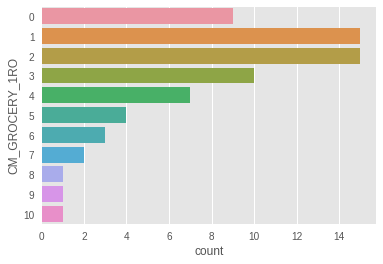

In [0]:
sns.countplot(y='CM_GROCERY_1RO', data=df)

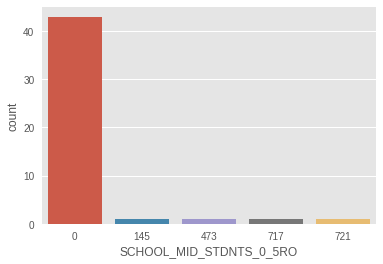

In [0]:
sns.countplot(x='SCHOOL_MID_STDNTS_0_5RO', data=df)

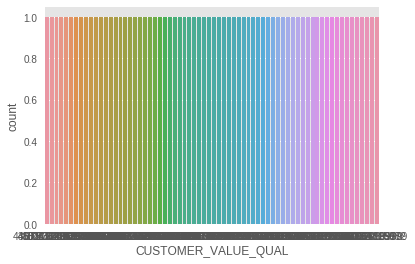

In [0]:
sns.countplot(x='CUSTOMER_VALUE_QUAL', data=df)

In [0]:
df.describe()

,SQFT,SALES_2018,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,AGE_BABYBOOM5069_16TO,AGE_COLLG1821_8TO,AGE_COLLG1821_16TO,AGE_DRINKADULT21P_8TO,AGE_DRINKADULT21P_16TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
count,65.000000,6.500000e+01,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.000000,6.500000e+01,65.000000
mean,44765.520462,6.294974e+06,31302.800000,128500.953846,9403.584615,39901.123077,2318.815385,9580.153846,29606.553846,121443.692308,...,80.766154,79.515231,78.660462,77.557231,76.117385,75.377692,7.396265e+06,616.109696,8.162011e+06,466.281494
std,20175.740915,2.880167e+06,10271.766371,59288.447212,3159.183918,17606.405932,1790.362489,5095.056704,9850.470793,56230.449076,...,16.574160,15.428243,14.098857,17.369136,15.963384,14.696121,2.642528e+06,72.183908,4.538518e+06,30.154744
min,11730.000000,2.161265e+06,8465.000000,39299.000000,3237.000000,13429.000000,413.000000,2070.000000,8163.000000,37760.000000,...,26.820000,34.610000,41.370000,25.330000,32.900000,37.510000,3.047761e+06,446.043799,2.599707e+06,401.038120
25%,18869.200000,2.539591e+06,24326.000000,74363.000000,7572.000000,24537.000000,1344.000000,6113.000000,23195.000000,70999.000000,...,72.030000,69.770000,70.770000,67.800000,65.920000,67.210000,5.295538e+06,579.059825,5.158429e+06,445.813503
50%,51209.500000,6.609084e+06,30251.000000,126188.000000,9048.000000,38188.000000,1858.000000,8142.000000,29102.000000,119690.000000,...,85.810000,84.710000,80.120000,82.050000,80.420000,76.780000,7.193443e+06,617.779872,7.075286e+06,469.303375
75%,57428.700000,7.819708e+06,37911.000000,158010.000000,11035.000000,49288.000000,2615.000000,11682.000000,35453.000000,144527.000000,...,93.910000,91.560000,90.470000,91.760000,88.550000,88.080000,9.295183e+06,657.907718,9.678016e+06,488.294476
max,86695.050000,1.330439e+07,58897.000000,314026.000000,18345.000000,93057.000000,12079.000000,24413.000000,56462.000000,298832.000000,...,97.470000,96.820000,96.630000,96.350000,95.340000,95.010000,1.341490e+07,812.681598,2.562182e+07,537.169742


In [11]:
#features with the most correlation with the predicted variable
corr = df.corr()
print("features with the most correlation with SALES_2018")
print(corr['SALES_2018'].sort_values(ascending = False)[:20], '\n')
print(corr['SALES_2018'].sort_values(ascending = False)[-20:])

features with the most correlation with SALES_2018
SALES_2018                 1.000000
SQFT                       0.599724
XEDUC_PRO_16TO             0.318752
XLABOR_SRV_16TO            0.246431
XEDUC_PRO_8TO              0.238219
SCHOOL_MID_STDNTS_0_5RO    0.224693
XHVAL_L49K_16TO            0.224262
CM_GROCERY_1RO             0.211012
HVAL_MED_COLADJ_8TO        0.206517
HVAL_MED_COLADJ_16TO       0.202479
XRACE_WHTHH_16TO           0.196853
XRACE_WHTPOP_16TO          0.193049
XAGE_ADULT18P_8TO          0.190086
SCHOOL_MID_SCHLS_0_5RO     0.172810
HVAL_MED_COLADJ_1RO        0.169267
XHHINC_L25K_8TO            0.166384
XLABOR_SRV_8TO             0.160391
XHVAL_1MPL_16TO            0.158363
XLABOR_WHT_1RO             0.158340
XHVAL_L49K_1RO             0.156345
Name: SALES_2018, dtype: float64 

HHINC_50_74K_8TO       -0.284637
MARRIEDPOP_8TO         -0.287393
XEDUC_ASSCT_16TO       -0.289845
AWMNSGRLS_8TO          -0.292026
XCX02V051_8TO          -0.296754
HHSZ3_8TO              -0.297

In [0]:
corr_with_sales = df.corr()["SALES_2018"].sort_values(ascending=False)
plt.figure(figsize=(20,12))
corr_with_sales.drop("SALES_2018").plot.bar()
plt.show();

In [0]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest_reg(data_frame, target, k=10):
    """
    Selecting K-Best features regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

In [10]:
per_feat = select_kbest_reg(df, 'SALES_2018', k=10)
per_feat = per_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
print("\n Feature Score using regression\n")
print(per_feat)


 Feature Score using regression

       F Score   P Value  Support               Attribute
0    25.276098  0.000008     True                    SQFT
72   11.084478  0.001744     True         CNT_MALLS_0_5RO
197   9.679072  0.003232     True           LABOR_BLU_8TO
73    7.508323  0.008774     True           CNT_MALLS_1RO
198   5.339386  0.025488     True          LABOR_BLU_16TO
350   5.089200  0.028983     True          XEDUC_PRO_16TO
91    5.028681  0.029904     True            CX02V051_8TO
396   4.970037  0.030826     True          XLABOR_BLU_8TO
163   4.969980  0.030827     True               HHSZ4_8TO
36    4.877123  0.032351     True          AWMNSGRLS_16TO
96    4.800521  0.033670    False          EDUC_ASSCT_8TO
196   4.756890  0.034448    False           LABOR_BLU_1RO
165   4.672976  0.035998    False               HHSZ5_8TO
159   4.661136  0.036222    False              HHSZ3P_8TO
334   4.506590  0.039299    False         XEDUC_ASSCT_8TO
74    4.433887  0.040844    False    C

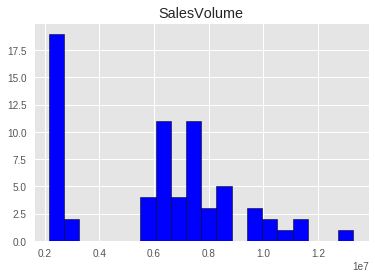

In [0]:
y = df['SALES_2018']
plt.title('SalesVolume')

#y.plot.hist(COLOR = "green", bins = 20, ec = "black")
plt.hist(y,COLOR = "blue", bins = 20, ec = "black")
plt.show()

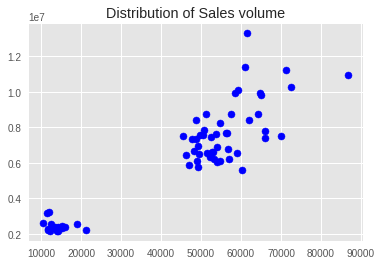

In [0]:
y = df['SALES_2018']
x = df['SQFT']
plt.title('Distribution of Sales volume')
plt.scatter(x, y, COLOR = "blue")
plt.show()

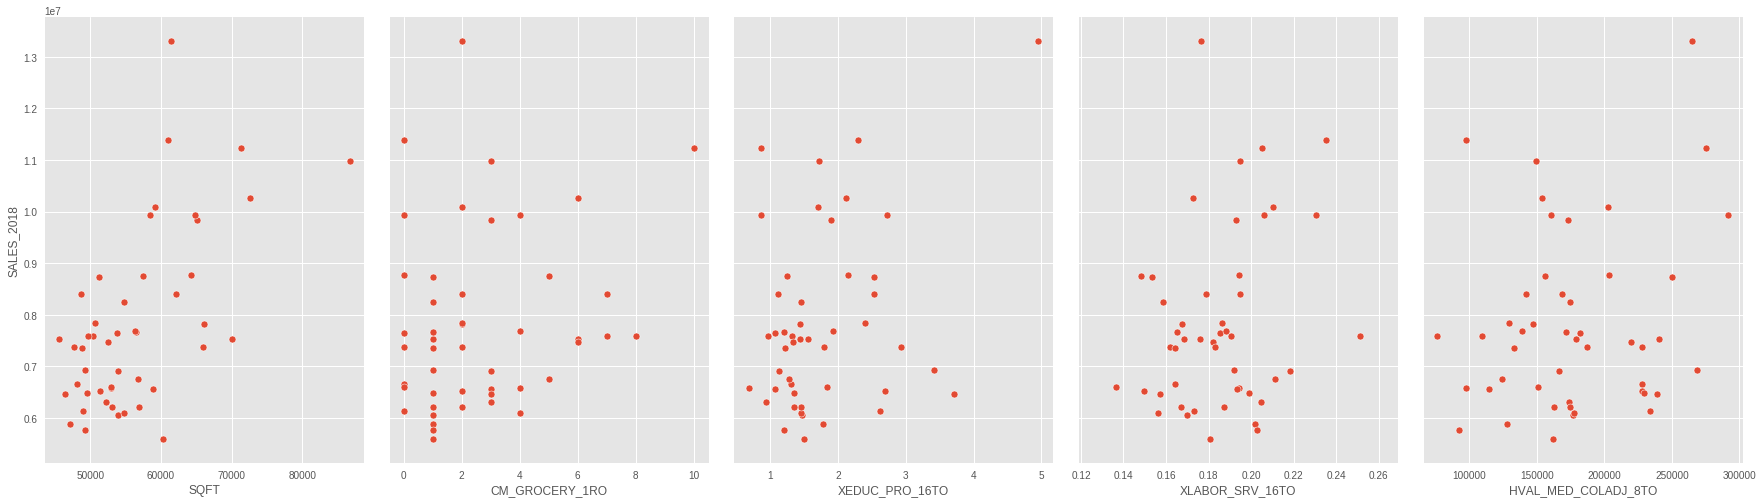

In [12]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['SQFT', 'CM_GROCERY_1RO', 'XEDUC_PRO_16TO', 'XLABOR_SRV_16TO', 'HVAL_MED_COLADJ_8TO'], y_vars='SALES_2018', size=7, aspect=0.7)

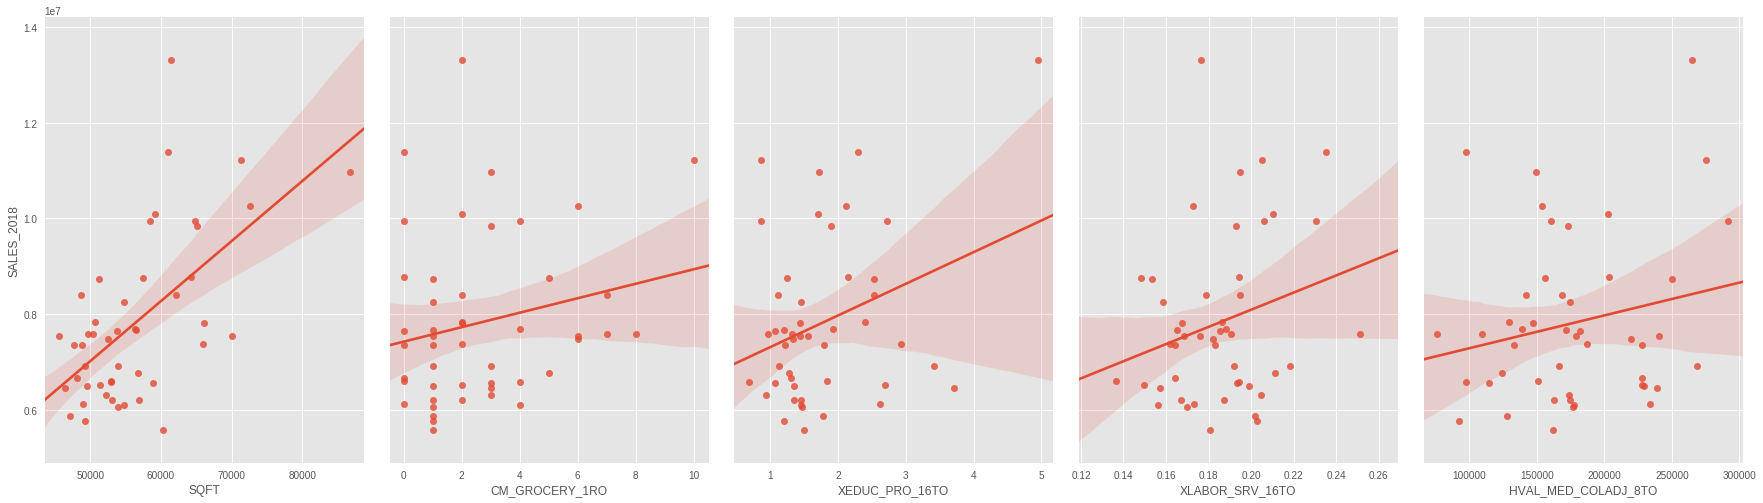

In [13]:
#Plotting the Least Squares Line¶
sns.pairplot(df, x_vars=['SQFT', 'CM_GROCERY_1RO', 'XEDUC_PRO_16TO', 'XLABOR_SRV_16TO', 'HVAL_MED_COLADJ_8TO'], y_vars='SALES_2018', size=7, aspect=0.7, kind='reg')

In [0]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df[['SALES_2018', 'SQFT', 'CM_GROCERY_1RO', 'XEDUC_PRO_16TO', 'XLABOR_SRV_16TO', 'HVAL_MED_COLADJ_8TO']])
plt.show();

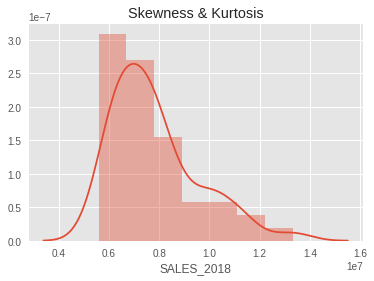

In [0]:
# skew and kurtosis
sns.distplot(df.SALES_2018)
plt.title("Skewness & Kurtosis")
plt.show();

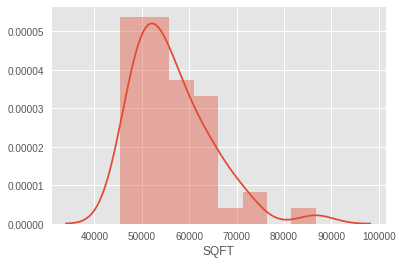

In [0]:
# skew and kurtosis
sns.distplot(df.SQFT)
plt.show();

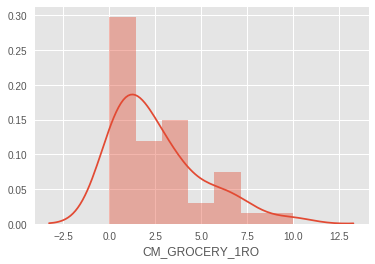

In [0]:
# skew and kurtosis
sns.distplot(df.CM_GROCERY_1RO)
plt.show();

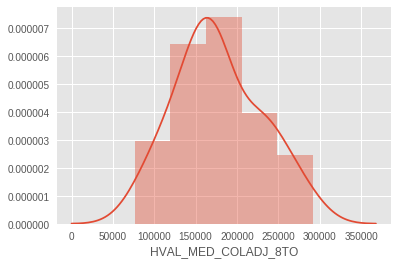

In [14]:
# skew and kurtosis
sns.distplot(df.HVAL_MED_COLADJ_8TO)
plt.show();

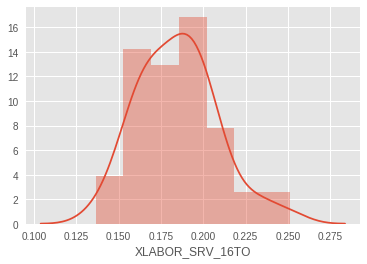

In [15]:
# skew and kurtosis
sns.distplot(df.XLABOR_SRV_16TO)
plt.show();

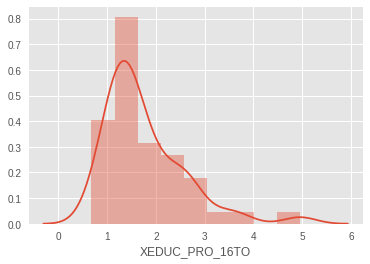

In [16]:
# skew and kurtosis
sns.distplot(df.XEDUC_PRO_16TO)
plt.show();

In [0]:
y = df.SALES_2018
X = df.loc[:, df.columns != 'SALES_2018']

In [0]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
#Predict with all variables
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X, y)

# Predict
y_pred = lm2.predict(X)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

0.0001426156213664004


LR picked 441 features and eliminated the other 0 features


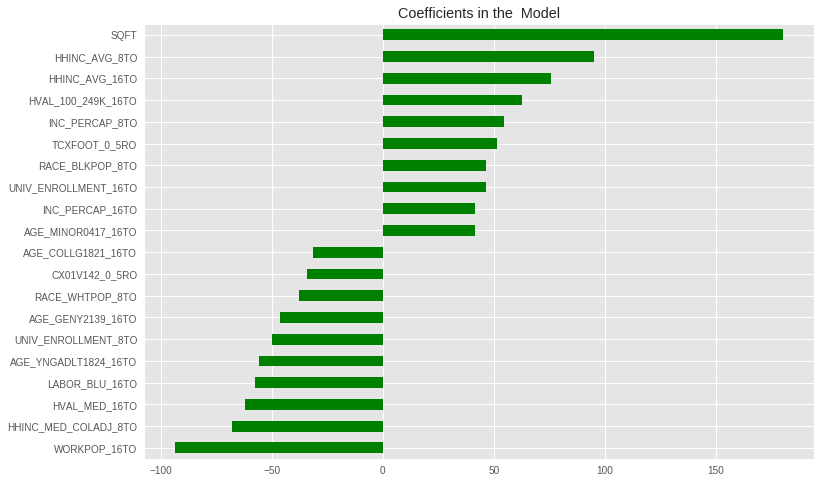

In [22]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 441)
(5, 441)
(42,)
(5,)


In [24]:
#Prediction with split of training & test data
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6734358.640666005


LR picked 438 features and eliminated the other 3 features


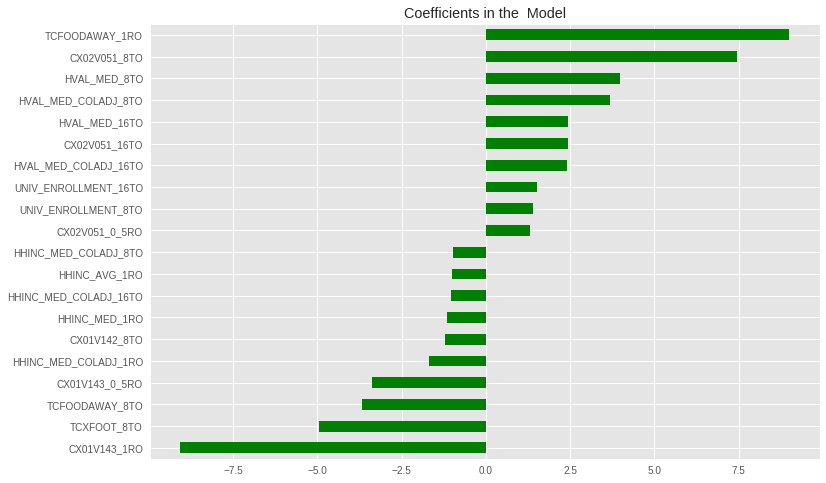

In [25]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X_train.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [0]:
df.HVAL_MED_COLADJ_1RO

In [46]:
# Include only the selected 5
X = df[['SQFT', 'CM_GROCERY_1RO', 'XEDUC_PRO_16TO', 'XLABOR_SRV_1RO', 'HVAL_MED_COLADJ_1RO']]
y = df.SALES_2018

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1469956.6117458886


5 features, reduction of 0.00%


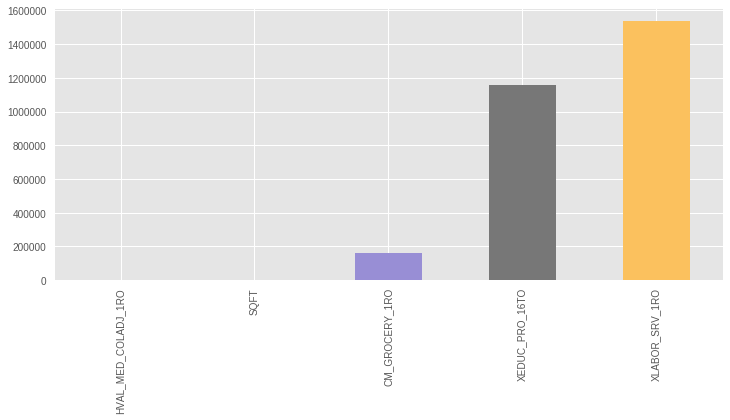

In [44]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(lm2.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5));

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
y_test_pred = lm2.predict(X_test)
y_train_pred = lm2.predict(X_train)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1048960221285.365, test: 2160772440415.453
R^2 train: 0.646, test: 0.238


the test data is undersampled, or too less.

In [47]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['SQFT', 'CM_GROCERY_1RO', 'XEDUC_PRO_16TO', 'XLABOR_SRV_1RO', 'HVAL_MED_COLADJ_1RO']
X = df[feature_cols]
y = df.SALES_2018

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-1712469.1480316026
[1.18924392e+02 1.21741934e+05 6.50576825e+05 1.73575558e+06
 5.63728213e+00]


LR picked 5 features and eliminated the other 0 features


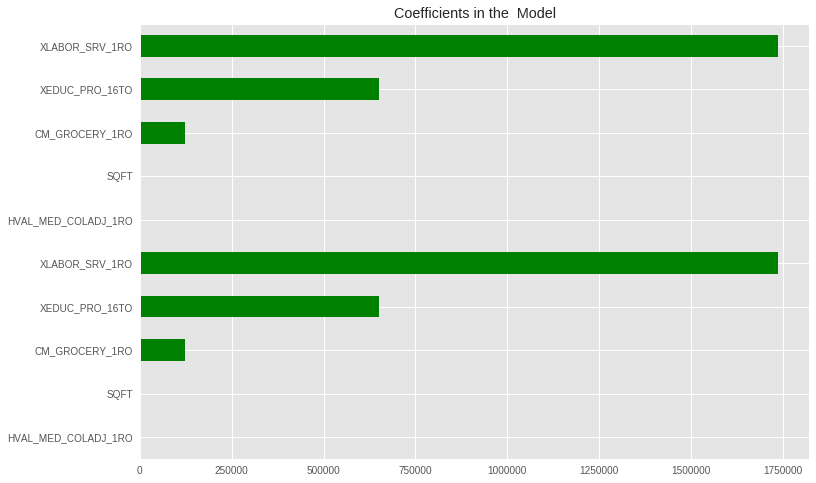

In [48]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [49]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('SQFT', 118.92439217728739),
 ('CM_GROCERY_1RO', 121741.9338661599),
 ('XEDUC_PRO_16TO', 650576.8250654112),
 ('XLABOR_SRV_1RO', 1735755.5842730803),
 ('HVAL_MED_COLADJ_1RO', 5.637282132083783)]

In [50]:
y_pred = lm2.predict(X)
r2_score(y, y_pred)

0.5080259760937444

In [51]:
# make predictions on the testing set
y_pred = lm2.predict(X_test)
y_pred

array([ 7867688.9272124 ,  6993087.33373212,  7639021.40460934,
        7666130.23665549,  6827374.59636838,  7544115.17543144,
        7006470.13783683, 11328305.70625686,  8234496.67238306,
        9546145.25316251,  8425321.85163843,  5921760.09698354,
        6663189.60209282,  9658752.49035394,  7089838.85201705,
       10401863.89168097,  7969087.89369321,  6978109.84780832,
        7557918.29698005,  7116648.05719986,  8637635.49884104,
        7089693.88229538,  7588474.01292139,  9361960.60708576])

In [52]:
y_test

SID
21266523    8.730941e+06
21266521    7.589506e+06
23943980    6.764124e+06
23501127    6.092905e+06
21266498    7.538990e+06
21266499    6.917103e+06
21266528    6.490320e+06
22847644    1.097451e+07
26111966    6.464064e+06
21266525    7.381394e+06
21266516    1.139100e+07
23501128    5.768259e+06
26148374    7.366757e+06
23074141    7.534766e+06
21266522    7.837343e+06
23501126    1.122479e+07
21266526    6.920792e+06
21266520    6.053572e+06
21266509    9.940089e+06
23943958    6.130023e+06
21266514    8.770530e+06
26111963    6.208032e+06
21266500    8.395815e+06
21266527    9.940541e+06
Name: SALES_2018, dtype: float64

In [53]:
print("y_true=%s, Predicted=%s" % (y_test, y_pred))

y_true=SID
21266523    8.730941e+06
21266521    7.589506e+06
23943980    6.764124e+06
23501127    6.092905e+06
21266498    7.538990e+06
21266499    6.917103e+06
21266528    6.490320e+06
22847644    1.097451e+07
26111966    6.464064e+06
21266525    7.381394e+06
21266516    1.139100e+07
23501128    5.768259e+06
26148374    7.366757e+06
23074141    7.534766e+06
21266522    7.837343e+06
23501126    1.122479e+07
21266526    6.920792e+06
21266520    6.053572e+06
21266509    9.940089e+06
23943958    6.130023e+06
21266514    8.770530e+06
26111963    6.208032e+06
21266500    8.395815e+06
21266527    9.940541e+06
Name: SALES_2018, dtype: float64, Predicted=[ 7867688.9272124   6993087.33373212  7639021.40460934  7666130.23665549
  6827374.59636838  7544115.17543144  7006470.13783683 11328305.70625686
  8234496.67238306  9546145.25316251  8425321.85163843  5921760.09698354
  6663189.60209282  9658752.49035394  7089838.85201705 10401863.89168097
  7969087.89369321  6978109.84780832  7557918.2969800

In [54]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1054617.285337474
1620733207773.791
1273080.2047686512
